# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [19]:
df = pd.read_csv('/content/drive/MyDrive/데이터/airbnb_listings.csv')

<ipython-input-19-3eb8d195f5b9>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/데이터/airbnb_listings.csv')


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [21]:
# Q1
pd.set_option('display.max_columns',None)
df.head(5)

,Unnamed: 0,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [22]:
# Q2

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50796 entries, 0 to 50795
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        50796 non-null  int64  
 1   id                                50796 non-null  int64  
 2   host_response_time                31790 non-null  object 
 3   host_response_rate                31790 non-null  object 
 4   host_acceptance_rate              36781 non-null  object 
 5   host_is_superhost                 50791 non-null  object 
 6   host_listings_count               50791 non-null  float64
 7   host_total_listings_count         50791 non-null  float64
 8   host_verifications                50796 non-null  object 
 9   host_has_profile_pic              50791 non-null  object 
 10  host_identity_verified            50791 non-null  object 
 11  neighborhood                      50796 non-null  object 
 12  lati

In [23]:
df_null = df.isnull().sum().to_frame().rename(columns={0:'missing_num'})
df_null = df_null[df_null['missing_num']!=0]
df_null

,missing_num
host_response_time,19006
host_response_rate,19006
host_acceptance_rate,14015
host_is_superhost,5
host_listings_count,5
host_total_listings_count,5
host_has_profile_pic,5
host_identity_verified,5
bathrooms,54
bedrooms,77


In [24]:
#Q2
df_sort = df_null.sort_values(by=df_null.columns[0],ascending=False)
df_sort['missing_%']=df_sort['missing_num']/50796*100
df_sort

,missing_num,missing_%
jurisdiction_names,50781,99.970470
license,50759,99.927160
square_feet,50407,99.234192
monthly_price,46119,90.792582
weekly_price,45411,89.398772
host_response_rate,19006,37.416332
host_response_time,19006,37.416332
security_deposit,17325,34.107016
host_acceptance_rate,14015,27.590755
review_scores_value,11482,22.604142


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

<Axes: ylabel='missing_%'>

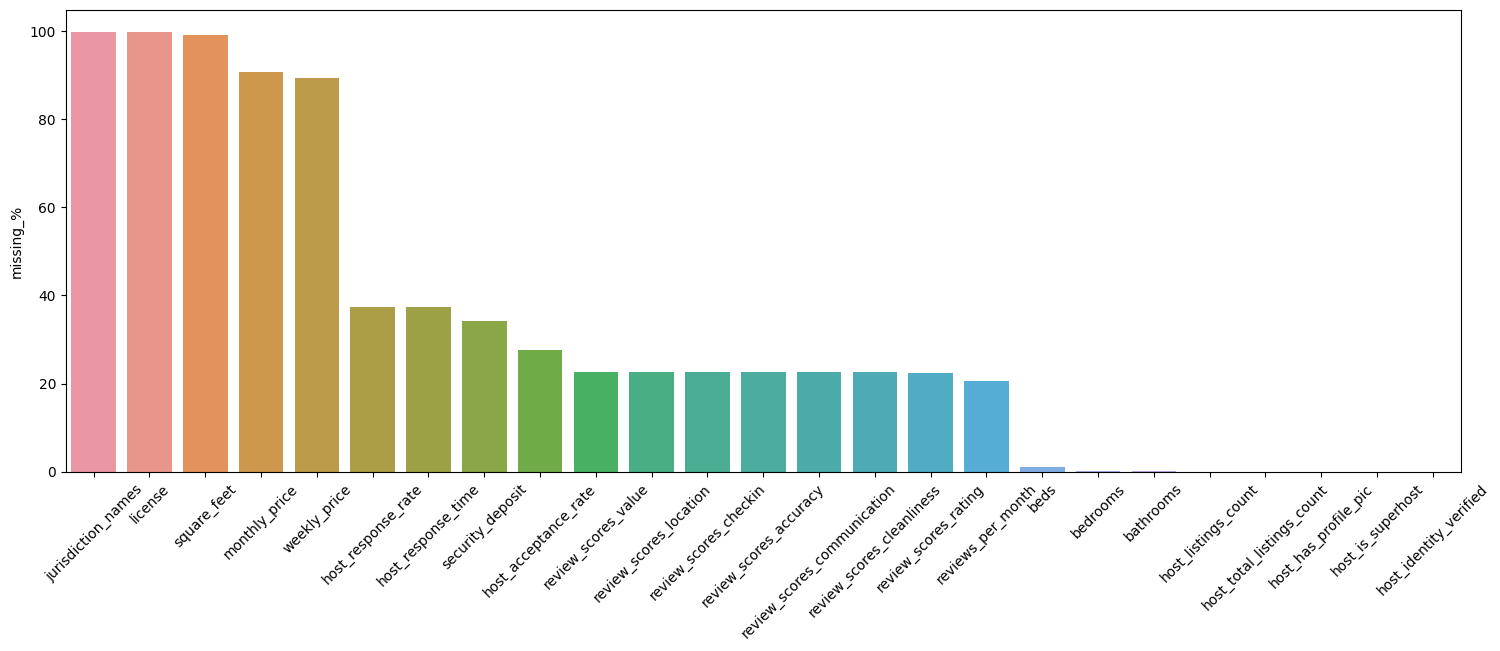

In [58]:
# Q3
plt.figure(figsize=(18, 6))
plt.xticks(rotation =  45)
sns.barplot(data = df_sort, x= df_sort.index, y='missing_%')

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [34]:
# Q4
df_beds = df[df.beds.isna()]
df_beds.head(5)

,Unnamed: 0,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [35]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [36]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50796 entries, 0 to 50795
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        50796 non-null  int64  
 1   id                                50796 non-null  int64  
 2   host_is_superhost                 50791 non-null  object 
 3   host_listings_count               50791 non-null  float64
 4   host_total_listings_count         50791 non-null  float64
 5   host_verifications                50796 non-null  object 
 6   host_has_profile_pic              50791 non-null  object 
 7   host_identity_verified            50791 non-null  object 
 8   neighborhood                      50796 non-null  object 
 9   latitude                          50796 non-null  float64
 10  longitude                         50796 non-null  float64
 11  is_location_exact                 50796 non-null  object 
 12  prop

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

<Axes: xlabel='room_type', ylabel='count'>

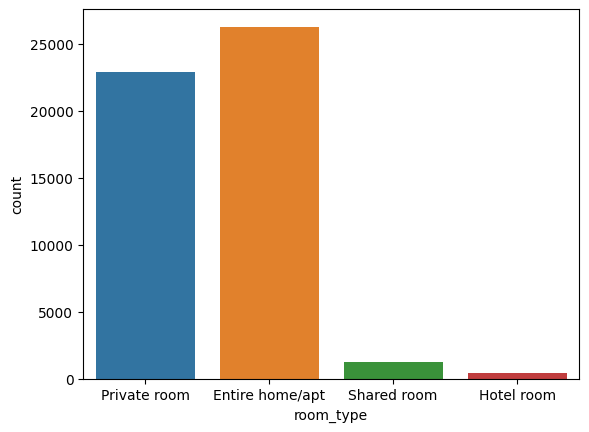

In [39]:
# Q5
sns.countplot(x="room_type", data=df)

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

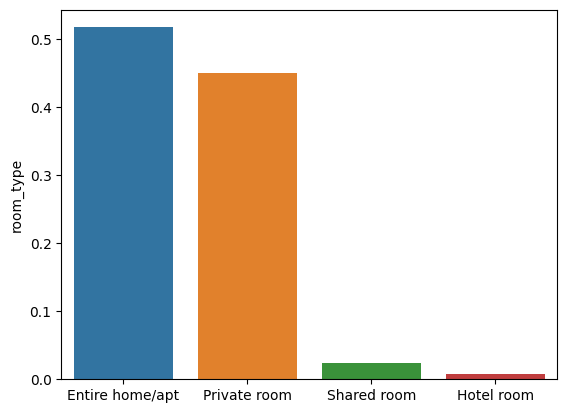

In [42]:
# Q6
df_counts = df['room_type'].value_counts(normalize=True)
sns.barplot(x=df_counts.index, y=df_counts.values)
plt.ylabel('room_type')
plt.show()

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

<Axes: xlabel='neighborhood', ylabel='count'>

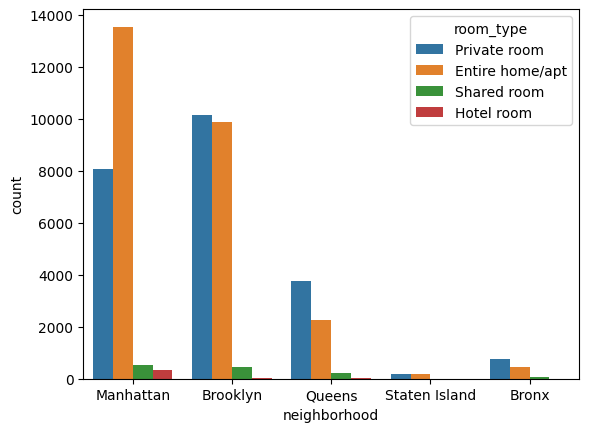

In [45]:
# Q7
sns.countplot(x='neighborhood', hue = "room_type", data=df)

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

<Axes: xlabel='neighborhood', ylabel='price'>

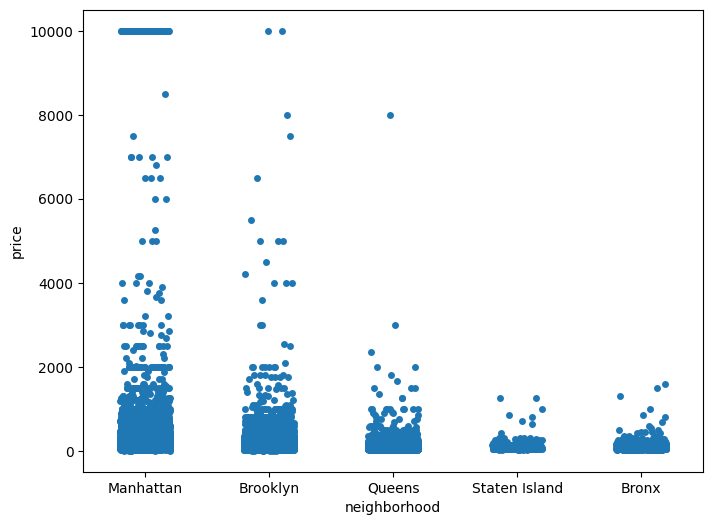

In [47]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
plt.figure(figsize=(8, 6))
sns.stripplot( x = "neighborhood", y = "price", data = df, jitter = 0.2)

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [48]:
# Q9
#room_type이 Entire home/apt가 제일 많고 Private room, Shared room, Hotel room 순서대로 많이 있다.
#Manhattan 지역에 room이 제일 많이 있었으며, 이 지역을 제외하고는 private room이 Entire home/apt보다 많다.
#Manhattan에서 비교적 높은 금액대의 room들이 있었으며 2000 아래의 금액대에 데이터가 몰려있다.


---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

<Axes: xlabel='accommodates', ylabel='Count'>

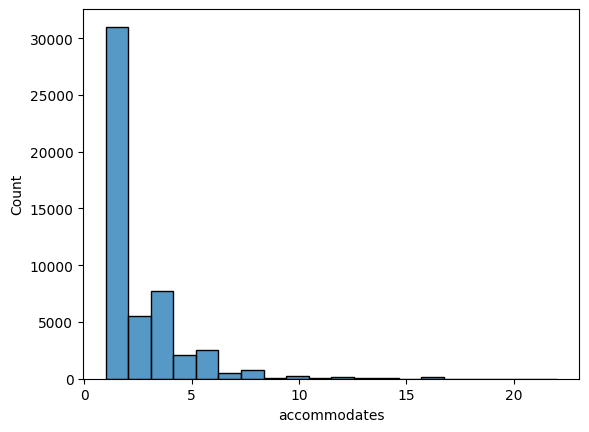

In [50]:
# Q10
sns.histplot(data=df, x='accommodates', bins=20)

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

<Axes: xlabel='price', ylabel='Count'>

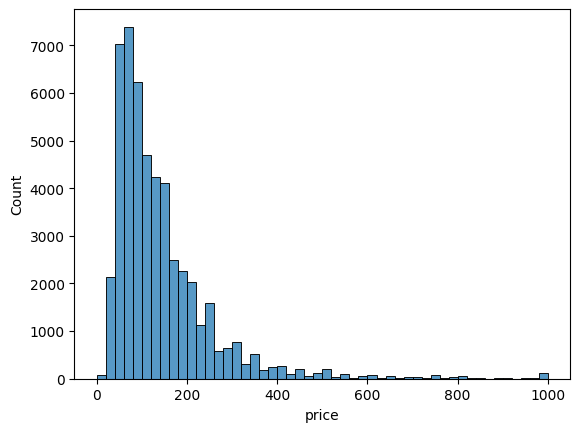

In [53]:
# Q11
sns.histplot(data=df, x='price', bins=50, binrange=(0, 1000))

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [69]:
df = pd.read_csv('/content/drive/MyDrive/데이터/airbnb_listings.csv')
df

<ipython-input-69-6a28b06b7188>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/데이터/airbnb_listings.csv')


,Unnamed: 0,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.857220,-73.937900,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.753620,-73.983770,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.685140,-73.959760,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.747670,-73.975000,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.719100,-73.990400,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50791,50791,42890680,within an hour,100%,100%,f,5.0,5.0,"['email', 'phone', 'offline_government_id', 's...",t,f,Manhattan,40.814840,-73.946340,f,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",NaN,150,NaN,NaN,$0.00,1,$0.00,5,1125,t,25,55,85,271,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,t,f,flexible,f,f,NaN
50792,50792,42890730,within an hour,100%,99%,f,21.0,21.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.769807,-73.987225,t,Apartment,Entire home/apt,2,1.0,0.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",NaN,149,NaN,NaN,NaN,1,$0.00,2,5,t,23,53,83,83,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,t,f,flexible,f,f,NaN
50793,50793,42891018,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,Manhattan,40.736252,-74.002622,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Pets allowed...",NaN,188,NaN,NaN,NaN,1,$0.00,3,30,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,t,f,flexible,f,f,NaN
50794,50794,42891637,NaN,NaN,100%,f,2.0,2.0,"['email', 'phone', 'offline_government_

- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [70]:
#Q12
missing_ratio = df.isna().mean()
for col in df.columns:
    if missing_ratio[col] >= 0.25:
        df = df.drop(columns=[col])
    elif missing_ratio[col] >= 0.1:
        df = df.dropna(subset=[col])
    else:
        mode_value = df[col].mode().iloc[0]
        df[col] = df[col].fillna(mode_value)
df

,Unnamed: 0,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
1,1,2595,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,0.38
2,2,3831,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",89,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,f,f,moderate,f,f,4.71
3,3,5099,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,f,f,moderate,t,t,0.59
4,4,5114,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",94,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,0.56
5,5,5121,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,Brooklyn,40.68688,-73.95596,f,Apartment,Private room,2,1.0,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",60,1,$30.00,29,730,t,30,60,90,365,50,1,90.0,8.0,8.0,10.0,10.0,9.0,9.0,f,f,f,strict_14_with_grace_period,f,f,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50490,50490,42750206,f,0.0,0.0,"['phone', 'offline_government_id', 'selfie', '...",t,f,Queens,40.74024,-73.82093,t,Villa,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Free street ...",39,1,$0.00,1,1125,t,28,58,88,88,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,moderate,f,f,1.00
50526,50526,42762152,f,1.0,1.0,"['email', 'phone']",t,f,Brooklyn,40.68645,-73.93803,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Smoking allowed"",""Smoke detecto...",80,1,$0.00,2,21,t,28,58,88,363,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,flexible,f,f,1.00
50598,50598,42794256,f,0.0,0.0,"['email', 'phone', 'offline_government_id', 's...",t,f,Manhattan,40.83212,-73.94180,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",55,2,$100.00,1,1125,t,0,23,53,328,2,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,2.00
50650,50650,42816035,f,10.0,10.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,Manhattan,40.76166,-73.99113,t,Condominium,Entire home/apt,3,1.5,2.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,""S...",180,1,$0.00,21,1125,t,28,58,88,363,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,1.00


- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [71]:
#Q13-1)
#이유: neighborhood에 따라서 price와 room_type가 바뀌기 때문에 one-hot encoding으로 feature를 바꿨다.
pd = pd.get_dummies(df, columns=['neighborhood'])

,Unnamed: 0,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,neighborhood_Bronx,neighborhood_Brooklyn,neighborhood_Manhattan,neighborhood_Queens,neighborhood_Staten Island
1,1,2595,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,0.38,0,0,1,0,0
2,2,3831,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",89,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,f,f,moderate,f,f,4.71,0,1,0,0,0
3,3,5099,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,f,f,moderate,t,t,0.59,0,0,1,0,0
4,4,5114,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,40.71910,-73.99040,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",94,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,0.56,0,0,1,0,0
5,5,5121,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,40.68688,-73.95596,f,Apartment,Private room,2,1.0,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",60,1,$30.00,29,730,t,30,60,90,365,50,1,90.0,8.0,8.0,10.0,10.0,9.0,9.0,f,f,f,strict_14_with_grace_period,f,f,0.38,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50490,50490,42750206,f,0.0,0.0,"['phone', 'offline_government_id', 'selfie', '...",t,f,40.74024,-73.82093,t,Villa,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Free street ...",39,1,$0.00,1,1125,t,28,58,88,88,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,moderate,f,f,1.00,0,0,0,1,0
50526,50526,42762152,f,1.0,1.0,"['email', 'phone']",t,f,40.68645,-73.93803,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Smoking allowed"",""Smoke detecto...",80,1,$0.00,2,21,t,28,58,88,363,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,flexible,f,f,1.00,0,1,0,0,0
50598,50598,42794256,f,0.0,0.0,"['email', 'phone', 'offline_government_id', 's...",t,f,40.83212,-73.94180,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",55,2,$100.00,1,1125,t,0,23,53,328,2,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,2.00,0,0,1,0,0
50650,50650,42816035,f,10.0,10.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,40.76166,-73.99113,t,Condominium,Entire home/apt,3,1.5,2.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,""S...",180,1,$0.00,21,1125,t,28,58,88,363,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,1.00,0,0,1,0,0


In [72]:
#Q13-2)
#price feature가 특정 값에 몰려있으므로 standard scaling을 하여 price feature를 바꿨다.
from sklearn.preprocessing import StandardScaler
sd_scaler = StandardScaler()
sd_scaler = sd_scaler.fit_transform(df['price'].values.reshape(-1,1))
df['price'] = sd_scaler
df

,Unnamed: 0,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
1,1,2595,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",0.203301,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,0.38
2,2,3831,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",-0.176956,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,f,f,moderate,f,f,4.71
3,3,5099,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",0.133401,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,f,f,moderate,t,t,0.59
4,4,5114,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",-0.162976,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,0.56
5,5,5121,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,Brooklyn,40.68688,-73.95596,f,Apartment,Private room,2,1.0,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",-0.258040,1,$30.00,29,730,t,30,60,90,365,50,1,90.0,8.0,8.0,10.0,10.0,9.0,9.0,f,f,f,strict_14_with_grace_period,f,f,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50490,50490,42750206,f,0.0,0.0,"['phone', 'offline_government_id', 'selfie', '...",t,f,Queens,40.74024,-73.82093,t,Villa,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Free street ...",-0.316757,1,$0.00,1,1125,t,28,58,88,88,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,moderate,f,f,1.00
50526,50526,42762152,f,1.0,1.0,"['email', 'phone']",t,f,Brooklyn,40.68645,-73.93803,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Smoking allowed"",""Smoke detecto...",-0.202120,1,$0.00,2,21,t,28,58,88,363,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,flexible,f,f,1.00
50598,50598,42794256,f,0.0,0.0,"['email', 'phone', 'offline_government_id', 's...",t,f,Manhattan,40.83212,-73.94180,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",-0.272020,2,$100.00,1,1125,t,0,23,53,328,2,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,2.00
50650,50650,42816035,f,10.0,10.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,Manhattan,40.76166,-73.99113,t,Condominium,Entire home/apt,3,1.5,2.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,""S...",0.077481,1,$0.00,21,1125,t,28,58,88,363,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,1.00


In [74]:
#Q13-3)
#room_type도 string 자료형이기 때문에 숫자로 파악하기 위해서 labeling encoding을 진행하였다.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded = encoder.fit_transform(df['room_type'])
df['room_type'] = encoded
df

,Unnamed: 0,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
1,1,2595,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,0,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",0.203301,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,0.38
2,2,3831,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,0,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",-0.176956,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,f,f,moderate,f,f,4.71
3,3,5099,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,0,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",0.133401,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,f,f,moderate,t,t,0.59
4,4,5114,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,2,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",-0.162976,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,0.56
5,5,5121,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,Brooklyn,40.68688,-73.95596,f,Apartment,2,2,1.0,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",-0.258040,1,$30.00,29,730,t,30,60,90,365,50,1,90.0,8.0,8.0,10.0,10.0,9.0,9.0,f,f,f,strict_14_with_grace_period,f,f,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50490,50490,42750206,f,0.0,0.0,"['phone', 'offline_government_id', 'selfie', '...",t,f,Queens,40.74024,-73.82093,t,Villa,2,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Free street ...",-0.316757,1,$0.00,1,1125,t,28,58,88,88,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,moderate,f,f,1.00
50526,50526,42762152,f,1.0,1.0,"['email', 'phone']",t,f,Brooklyn,40.68645,-73.93803,t,Apartment,2,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Smoking allowed"",""Smoke detecto...",-0.202120,1,$0.00,2,21,t,28,58,88,363,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,flexible,f,f,1.00
50598,50598,42794256,f,0.0,0.0,"['email', 'phone', 'offline_government_id', 's...",t,f,Manhattan,40.83212,-73.94180,t,Apartment,2,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",-0.272020,2,$100.00,1,1125,t,0,23,53,328,2,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,2.00
50650,50650,42816035,f,10.0,10.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,Manhattan,40.76166,-73.99113,t,Condominium,0,3,1.5,2.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,""S...",0.077481,1,$0.00,21,1125,t,28,58,88,363,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,1.00


---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가
</font>

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
